In [7]:
import datetime
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
# # https://www.cnblogs.com/-wenli/p/14020264.html
# # f = h5py.File('path/filename.h5','r') #打开h5文件
# f = h5py.File('Mnist_pFedMe_0.005_1.0_15_5u_20b_10_5_0.09_avg.h5','r')
# print(f.filename, ":")
# print([key for key in f.keys()], "\n")  

# #['rs_glob_acc', 'rs_train_acc', 'rs_train_loss'] 

# d = f['rs_glob_acc']

# # Print the data of 'dset'.
# print(d.name, ":")
# print(type(d[:]))
# print('-----------------------------------')
# print(len(d.attrs.keys()))
# # Print the attributes of dataset 'dset'.
# for key in d.attrs.keys():
#     print(key, ":", d.attrs[key])


In [23]:
stat_files = ['Mnist_FedAvg_0.005_1.0_15_5u_20b_20_0_fixed.h5',
             'Mnist_PerAvg_p_0.005_0.001_15_5u_20b_20_0_fixed.h5',
             'Mnist_pFedMe_0.005_1.0_15_5u_20b_20_5_0.09_0_fixed.h5',
             'Mnist_pFedMe_p_0.005_1.0_15_5u_20b_20_5_0.09_0.h5',
             'Mnist_pFedMe_0.005_1.0_15_5u_20b_20_5_0.09_0.h5',
             'Mnist_FedAvg_0.005_1.0_15_5u_20b_20_0.h5',
             'Mnist_PerAvg_p_0.005_0.001_15_5u_20b_20_0.h5',
             'Mnist_pFedMe_p_0.005_1.0_15_5u_20b_20_5_0.09_0_fixed.h5']

In [34]:
def compare_algorithms_in_three_aspects(algorithm = 'pFedme'):
    # some basic components
    fig, subplot_arr = plt.subplots(1,3,figsize=(18,4))
    plt.subplot(131)
    plt.xlabel("Global rounds")
    plt.ylabel("Test Accuracy") #y轴标签
    plt.title("pFedMe (Nonconvex)")
    plt.grid(linestyle=":", color="grey")
    plt.subplot(132)
    plt.xlabel("Global rounds")
    plt.ylabel("Test Accuracy") #y轴标签 
    plt.title("PerAvg (Nonconvex)")
    plt.grid(linestyle=":", color="grey")
    plt.subplot(133)
    plt.xlabel("Global rounds")
    plt.ylabel("Test Accuracy") #y轴标签 
    plt.grid(linestyle=":", color="grey")
    plt.title("FedAvg (Nonconvex)")
    for stat_file in stat_files:
        f = h5py.File(stat_file,'r')
        print(f.filename,":")
        print([key for key in f.keys()],"\n")
        n_pts = len(f['rs_glob_acc'][:])
        print("length of data points:", n_pts)
        #print([key for key in f.keys()],"\n")
        x = [pt for pt in range(n_pts)]
        y = f['rs_glob_acc'][:]
        if 'FedAvg' in stat_file:
            plt.subplot(133)
            plt.ylim(0.86, 0.98)
            lb = 'global'
            if 'fixed' in stat_file:
                lb = lb + ' fixed'
            plt.plot(x,y,linewidth=1,label = lb)
            plt.legend()
            
        elif 'PerAvg' in stat_file:
            plt.subplot(132)
            plt.ylim(0.86, 0.98)
            lb = 'global'
            if 'fixed' in stat_file:
                lb = lb + ' fixed'
            plt.plot(x,y,linewidth=1,label =lb)
            plt.legend()
        elif 'pFedMe' in stat_file:
            plt.subplot(131)
            plt.ylim(0.86, 0.98)
            lb = ''
#             if not '_p_' in stat_file and not 'fixed' in stat_file:
#                 lb = lb +' global'
            if '_p_' in stat_file:
                lb = lb +' personalized'
            else:
                lb = lb +' global'
            
            if 'fixed' in stat_file:
                lb = lb + ' fixed'
            
                
            plt.plot(x,y,linewidth=1,label =lb[1:])
            plt.legend()
            
    plt.show()
        

Mnist_FedAvg_0.005_1.0_15_5u_20b_20_0_fixed.h5 :
['rs_glob_acc', 'rs_train_acc', 'rs_train_loss'] 

length of data points: 800
Mnist_PerAvg_p_0.005_0.001_15_5u_20b_20_0_fixed.h5 :
['rs_glob_acc', 'rs_train_acc', 'rs_train_loss'] 

length of data points: 800
Mnist_pFedMe_0.005_1.0_15_5u_20b_20_5_0.09_0_fixed.h5 :
['rs_glob_acc', 'rs_train_acc', 'rs_train_loss'] 

length of data points: 800
Mnist_pFedMe_p_0.005_1.0_15_5u_20b_20_5_0.09_0.h5 :
['rs_glob_acc', 'rs_train_acc', 'rs_train_loss'] 

length of data points: 800
Mnist_pFedMe_0.005_1.0_15_5u_20b_20_5_0.09_0.h5 :
['rs_glob_acc', 'rs_train_acc', 'rs_train_loss'] 

length of data points: 800
Mnist_FedAvg_0.005_1.0_15_5u_20b_20_0.h5 :
['rs_glob_acc', 'rs_train_acc', 'rs_train_loss'] 

length of data points: 800
Mnist_PerAvg_p_0.005_0.001_15_5u_20b_20_0.h5 :
['rs_glob_acc', 'rs_train_acc', 'rs_train_loss'] 

length of data points: 800
Mnist_pFedMe_p_0.005_1.0_15_5u_20b_20_5_0.09_0_fixed.h5 :
['rs_glob_acc', 'rs_train_acc', 'rs_train_loss

/home/pei/anaconda3/envs/pysyft/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/pei/anaconda3/envs/pysyft/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/pei/anaconda3/envs/pysyft/lib/python3.7/site-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous ax

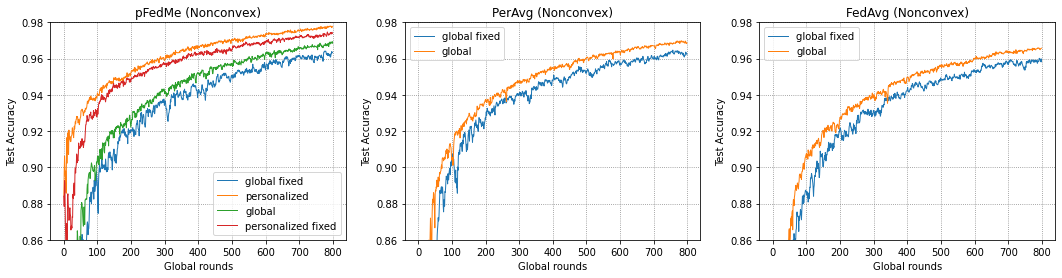

In [35]:
compare_algorithms_in_three_aspects()